In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import io
import numpy as np

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.1


In [2]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 30.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install python-multipart

Note: you may need to restart the kernel to use updated packages.


In [4]:
target_size = (28, 28)
class_names = [
  'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [5]:
def prepare_image(image):

  # resize the input image and preprocess it
  image = image.resize(target_size)
  image = img_to_array(image)
  image = image.reshape(1, 28, 28, 1)

  # return the processed image
  return image


In [6]:
model = tf.keras.models.load_model('primer_red_densa.h5', compile = False)

In [7]:
from PIL import ImageOps

In [8]:
data = {"success": False}
image = Image.open('./images/zapato.jpg').convert('L')
image = image.resize(target_size)
image = ImageOps.invert(image)
image

In [9]:


image = img_to_array(image) / 255.0
image = image.reshape(1, 28, 28)


data["prediction"] = model.predict(image).tolist()
data["success"] = True


1/1 [==============================] - 0s 58ms/step


In [10]:
data

{'success': True,
 'prediction': [[6.0594397837121505e-06,
   1.7757641190829787e-10,
   5.3003049060862395e-08,
   1.1270619854064634e-10,
   1.0364911418037082e-07,
   0.002089862013235688,
   2.2134007338081574e-07,
   0.9974873065948486,
   8.599438672263204e-08,
   0.0004162273253314197]]}

In [11]:
np.argmax(data['prediction'])

7

In [12]:

def plot_value_array( predictions_array):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


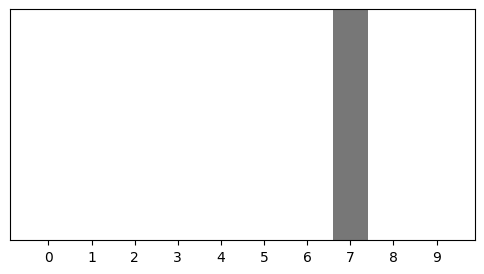

In [13]:
plt.figure(figsize=(6,3))
plot_value_array( data['prediction'])
plt.show()